# SMD Übungszettel Nr. 9

__Abgabe von: Pape, Kusurmann und Becker__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(8)

__WICHTIG__
Ich habe die `.csv` Datein angepasst, damit ich die einzelen Labels/Spalten im `DataFrame` ansprechen kann. 
Hätte ich das nicht gemacht, hätte ich zum Beispiel auf das Element `"y_1` zugreifen müssen und das hat mit
`pd_a['"y_1']` nicht funktioniert. Wisst ihr wie man das ohne Umbennen machen kann?


## Nr. 25

### Aufgabenteil a)


In [2]:
pd_a = pd.read_csv('./aufg_a.csv')

Es soll an ein Polynom sechsten Grades gefittet werden:
$$
P(x) = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g
$$
Stelle die Designmatrix auf:

In [3]:
def poly__6(x, a, b, c, d, e, f, g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x +g

In [4]:
x__6 = pd_a['x'].values**6
x__5 = pd_a['x'].values**5
x__4 = pd_a['x'].values**4
x__3 = pd_a['x'].values**3
x__2 = pd_a['x'].values**2
x__1 = pd_a['x'].values
x__0 = pd_a['x'].values * 1/pd_a['x'].values

In [5]:
A = np.array([x__6, x__5, x__4, x__3, x__2, x__1, x__0]).T

Berchene die Koeffizienten

In [6]:
cof = np.linalg.inv(A.T @ A) @ A.T @ pd_a['y'].values

print(f'Die berechneten Koeffizienten lauten: \n {cof}')

Die berechneten Koeffizienten lauten: 
 [-1.96288194e-04  4.78568044e-03 -4.52007747e-02  2.10566519e-01
 -5.13748208e-01  6.09609032e-01 -6.74453234e-02]


Berechne die Fehler:

In [7]:
sigma = np.zeros((8, 8), int)
np.fill_diagonal(sigma, 1)
var = np.linalg.inv(A.T @ A) @ A.T @ sigma @ A @ np.linalg.inv(A.T @ A)

__Frage__

Wie werden die Parameterfehler berechnet, wenn der Fehler von $y$ nicht bekannt ist oder nicht verwendet wird? 
Wenn in Pyhton zum Beispiel die Funktion `curve_fit` (bekannt aus dem Toolbox Workshop) verwendet wird, gibt diese  einen Fehler bzw. eine Korrelationsmatrix aus, obwohl die Fehler der Datenpunkte nicht mit angegbene wurden. 

Dann wir die $\hat{S}$ Matrix verwendet.

In [8]:
x_fit = np.linspace(min(pd_a['x'].values-0.5), max(pd_a['x'].values)+0.5, 100)

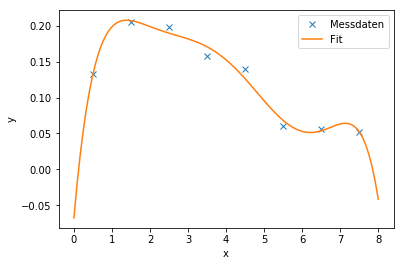

In [9]:
plt.plot(pd_a['x'].values, pd_a['y'].values,'x', label='Messdaten')
plt.plot(x_fit, poly__6(x_fit, *cof), label='Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Aufgabenteil b)

In [10]:
lambdar = [0.1, 0.3, 0.7, 3, 10]

In [11]:
def cof_reg(A, y, Gammar):
    return np.linalg.inv(A.T @ A + Gammar.T @ Gammar) @ A.T @ y

In [12]:
C  = np.zeros((8, 8))

In [13]:
np.fill_diagonal(C[1:], 1)
np.fill_diagonal(C[:, 1:], 1)
np.fill_diagonal(C, -2)

C[0,0] = -1
C[7, 7] = -1

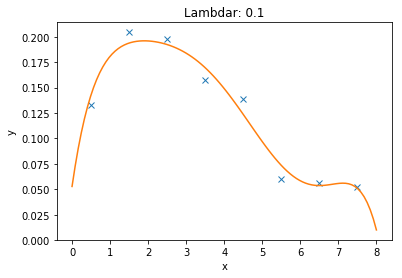

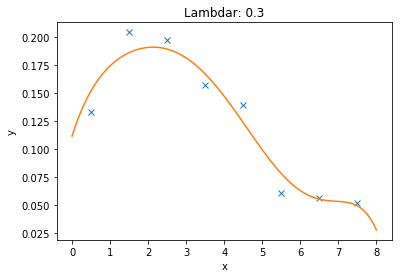

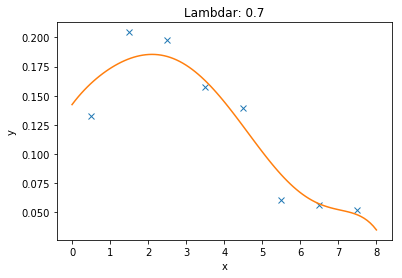

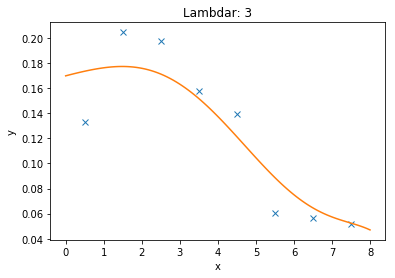

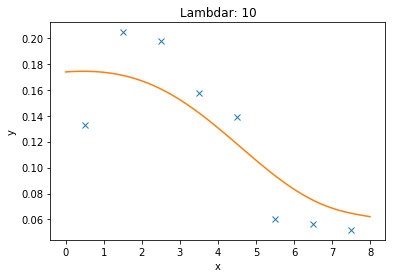

In [14]:
params = []

for lam in lambdar:
    Gammar = np.sqrt(lam) * C @ A
    
    para = cof_reg(A, pd_a['y'].values, Gammar)
    params.append(para)
    
    plt.plot(pd_a['x'].values, pd_a['y'].values,'x', label='Messdaten')
    plt.plot(x_fit, poly__6(x_fit, *para), label='Fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Lambdar: {lam}')
    plt.show()

Man erkennt eine deutliche Glätung der Funktion.

### Aufgabenteil c)

In [15]:
pd_c = pd.read_csv('./aufg_c.csv')

In [16]:
labels = ['x',]
for i in range(0,50):
    labels.append('y_'+str(i))


In [17]:
pd_c = pd.DataFrame(pd_c.values, columns=labels)

In [18]:
W = np.zeros((8,8))

In [19]:
stds = np.ones(pd_c.shape[0])
means =  np.ones(pd_c.shape[0])
for i in range(pd_c.shape[0]):
    stds[i] = pd_c.ix[i][1:].std(axis=0)
    means[i] = pd_c.ix[i][1:].mean(axis=0)

np.fill_diagonal(W, stds)

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [20]:
params_c = np.linalg.inv(A.T @ W @ A) @ A.T @ W @ means

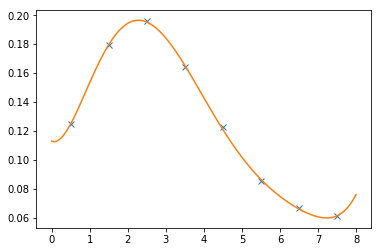

In [21]:
plt.plot(pd_a['x'].values, means,'x', label='Messdaten')
plt.plot(x_fit, poly__6(x_fit, *params_c), label='Fit')

## Nr. 26

### Aufgabenteil a)
Mit der Linearität des Erwartungswertes folgt:
$$\begin{aligned}
E(\bar{X}) = \frac{1}{n} \sum_{i=1}^n E(X_i) = \frac{1}{n} n \mu = \mu
\end{aligned}$$
Damit ist der Mittelwer erwartungstreu. 

### Aufgabenteil b)
Mit den Rechenregeln für die Varianz folgt:
$$\begin{aligned}
E\left(\left(\bar{X}- \mu\right)^2\right) &= \mathrm{Var}(\bar{X}) \\ 
&= \mathrm{Var}\left(\frac{1}{n}\sum_{i=1}^n X_i\right)\\ 
&= \frac{1}{n^2} \mathrm{Var}\left(\sum_{i=1}^n X_i\right) \\ 
&\overset{\star}{=} \frac{1}{n^2} \sum_{i=1} \mathrm{Var}(X_i) = \frac{\sigma}{n}
\end{aligned}$$

Die Gleichheit von $\star$ gilt nur wenn die $X_i$ nicht korelliert sind (ist nach Aufgabenstellung erfüllt). 
Vergleiche hierzu die [__Gleichung von Bienaymé__](https://de.wikipedia.org/wiki/Gleichung_von_Bienaym%C3%A9). 
Könnt ihr in der Übung einmal explizit zeigen wieso $\star$ nur gilt, wenn die $X_i$ nicht korrelliert sind. 
Ich glaube das hilft nochmal besser zu verstehen, wieso die Defintion der Kovarianz $\mathrm{Cov}$
die Korrelation berechnen. 

### Aufgabenteil c)
Mit der Linearität des Erwartungswertes folgt:

$$\begin{aligned}
E(S_0^2) = \frac{1}{n} \sum_{i=1}^{n} E\left(\left(X_i - \mu\right)^2\right) = \frac{1}{n} n \sigma = \sigma
\end{aligned}$$

Damit ist $S_0^2$ erwartungstreu.

### Aufgabenteil d)
Verwende auch hier die Linearität des Erwartungswertes und das Ergebnis aus _Aufgabenteil b) & c)_.

$$\begin{aligned}
E(S_1^2) = E\left(\frac{1}{n} \sum_{i=1}^{n} \left(X_i - \bar{X}\right)^2 \right)&= E\left(\frac{1}{n} \sum_{i=1}^{n} \left( \left(X_i - \mu\right) - \left( \bar{X} -\mu\right) \right)^2 \right)\\
&= E\left(\frac{1}{n} \sum_{i=1}^{n} \left( \left(X_i - \mu\right)^2 - 2\left(X_i -\mu\right)\left(\bar{X}-\mu\right)+\left(\bar{X}-\mu\right)^2\right)\right) \\
&= E\left(\left(\frac{1}{n} \sum_{i=1}^{n} \left(X_i - \mu\right)^2\right) - 2\left(\frac{1}{n} \sum_{i=1}^{n}\left(X_i -\mu\right)\left(\bar{X}-\mu\right)\right) + \left(\frac{1}{n} \sum_{i=1}^{n}\left(\bar{X}-\mu\right)^2\right)\right) \\
&= E\left(\left(\frac{1}{n} \sum_{i=1}^{n} \left(X_i - \mu\right)^2\right) - \left(\bar{X}-\mu\right)^2\right)\\
&=\left(\frac{1}{n} \sum_{i=1}^{n} E\left(\left(X_i - \mu\right)^2\right)\right) - E\left(\left(\bar{X}-\mu\right)^2\right) \\
&\overset{\mathrm{Mit \, b) \, \& \, c)}}{=} \sigma^2 - \frac{\sigma^2}{n} = \left(1-\frac{1}{n}\right)\sigma^2
\end{aligned}$$

### Aufgabe Nr. 27
Die Likelihood Funktion ist gegeben durch:
$$
L = \Pi_{i=1}^{n} f(x|b) = \frac{1}{b^n}
$$
Ziel ist die Maximierung von $L$, eine Gradientenbildung ist auf Grund der Unstetigkeit wenig sinnvoll. 
Stattdessen kann der Wert für $b$ diskutiert werden. Die Variabele $b$ muss mindestens so gewählt werden, 
dass die Gesamtestichprobe erzeugt werden kann, somit gilt 

$$
b\ge \mathrm{max}\left\{x_i\right\}, \quad  i\in\left\{1, \dots, n\right\}. \qquad (1)
$$

Zusätzlich muss die Likelihood Funktion maximiert werden. Wird diese Bedingung mit Gleichung $(1)$ kombiniert folgt: 

$$
b = \mathrm{max}\left\{x_i\right\} := x_{max}, \quad  i\in\left\{1, \dots, n\right\}.
$$